In [1]:
# %% [markdown]
# # Rice Disease Classification Prototype (Task 1)
# **Hardware Requirements:** NVIDIA GPU (4GB+ VRAM) or CPU (may be slower)

# %% [code]
# Environment Setup
%pip install tensorflow opencv-python-headless scikit-learn imbalanced-learn

# %% [code]
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import RandomOverSampler
import cv2, os, json

# Verify GPU availability
print("GPU Available:", tf.config.list_physical_devices('GPU'))

# %% [markdown]
# ## 1. Data Preparation Pipeline

# %% [code]
# Configuration
DATA_PATH = 'Dataset/new_preprocessed_images'
IMG_SIZE = 224
BATCH_SIZE = 32
CLASS_NAMES = sorted(os.listdir(DATA_PATH)) 


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 MB 9.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


2025-05-08 22:14:31.993757: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-08 22:14:31.997358: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-08 22:14:32.097921: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-08 22:14:32.134920: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746717272.203425  416534 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746717272.21

GPU Available: []


2025-05-08 22:14:34.634616: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Found 8330 images belonging to 10 classes.
Found 2077 images belonging to 10 classes.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d                │ (None, 220, 220, 32)   │           320 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_1              │ (None, 108, 108, 32)   │           320 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 108, 108, 64)   │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,258 (51.79 KB)

 Trainable params: 13,258 (51.79 KB)

 Non-trainable params: 0 (0.00 B)

/home/derrickle/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.0900 - loss: 0.4731

100/100 ━━━━━━━━━━━━━━━━━━━━ 48s 471ms/step - accuracy: 0.0903 - loss: 0.4731 - val_accuracy: 0.0944 - val_loss: 0.4685 - learning_rate: 0.0010
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 47s 470ms/step - accuracy: 0.0991 - loss: 0.4736 - val_accuracy: 0.0587 - val_loss: 0.4686 - learning_rate: 0.0010
Epoch 3/30
 61/100 ━━━━━━━━━━━━━━━━━━━━ 13s 342ms/step - accuracy: 0.0926 - loss: 0.4647

/home/derrickle/anaconda3/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 310ms/step - accuracy: 0.0997 - loss: 0.4671 - val_accuracy: 0.1575 - val_loss: 0.4686 - learning_rate: 0.0010
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.1178 - loss: 0.4668

100/100 ━━━━━━━━━━━━━━━━━━━━ 46s 463ms/step - accuracy: 0.1176 - loss: 0.4668 - val_accuracy: 0.1644 - val_loss: 0.4679 - learning_rate: 0.0010
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.1496 - loss: 0.4717

100/100 ━━━━━━━━━━━━━━━━━━━━ 47s 469ms/step - accuracy: 0.1495 - loss: 0.4717 - val_accuracy: 0.1200 - val_loss: 0.4667 - learning_rate: 0.0010
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 318ms/step - accuracy: 0.1286 - loss: 0.4602 - val_accuracy: 0.0794 - val_loss: 0.4687 - learning_rate: 0.0010
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.1316 - loss: 0.4535

100/100 ━━━━━━━━━━━━━━━━━━━━ 45s 451ms/step - accuracy: 0.1318 - loss: 0.4535 - val_accuracy: 0.1856 - val_loss: 0.4606 - learning_rate: 0.0010
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - accuracy: 0.1564 - loss: 0.4452

100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 433ms/step - accuracy: 0.1564 - loss: 0.4452 - val_accuracy: 0.1363 - val_loss: 0.4560 - learning_rate: 0.0010
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 300ms/step - accuracy: 0.1462 - loss: 0.4462 - val_accuracy: 0.1213 - val_loss: 0.4630 - learning_rate: 0.0010
Epoch 10/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.1581 - loss: 0.4493

100/100 ━━━━━━━━━━━━━━━━━━━━ 46s 461ms/step - accuracy: 0.1581 - loss: 0.4493 - val_accuracy: 0.1450 - val_loss: 0.4496 - learning_rate: 0.0010
Epoch 11/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 48s 481ms/step - accuracy: 0.1390 - loss: 0.4536 - val_accuracy: 0.1075 - val_loss: 0.4605 - learning_rate: 0.0010
Epoch 12/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 322ms/step - accuracy: 0.1452 - loss: 0.4584 - val_accuracy: 0.1575 - val_loss: 0.4521 - learning_rate: 0.0010
Epoch 13/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 49s 488ms/step - accuracy: 0.1311 - loss: 0.4602 - val_accuracy: 0.1631 - val_loss: 0.4500 - learning_rate: 0.0010
Epoch 14/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 48s 485ms/step - accuracy: 0.1772 - loss: 0.4435 - val_accuracy: 0.1425 - val_loss: 0.4513 - learning_rate: 5.0000e-04
Epoch 15/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 322ms/step - accuracy: 0.1420 - loss: 0.4566 - val_accuracy: 0.1369 - val_loss: 0.4542 - learning_rate: 5.0000e-04
Epoch 16/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 48s 484ms/step - accuracy: 

100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 349ms/step - accuracy: 0.1515 - loss: 0.4442 - val_accuracy: 0.1525 - val_loss: 0.4495 - learning_rate: 2.5000e-04
Epoch 19/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 55s 550ms/step - accuracy: 0.1659 - loss: 0.4544 - val_accuracy: 0.1700 - val_loss: 0.4512 - learning_rate: 2.5000e-04
Epoch 20/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 52s 525ms/step - accuracy: 0.1299 - loss: 0.4538 - val_accuracy: 0.1519 - val_loss: 0.4546 - learning_rate: 1.2500e-04
Epoch 21/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 332ms/step - accuracy: 0.1584 - loss: 0.4460 - val_accuracy: 0.1650 - val_loss: 0.4527 - learning_rate: 1.2500e-04
Epoch 22/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 50s 495ms/step - accuracy: 0.1747 - loss: 0.4489 - val_accuracy: 0.1681 - val_loss: 0.4501 - learning_rate: 1.2500e-04
Epoch 23/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - accuracy: 0.1567 - loss: 0.4467

100/100 ━━━━━━━━━━━━━━━━━━━━ 48s 484ms/step - accuracy: 0.1567 - loss: 0.4467 - val_accuracy: 0.1781 - val_loss: 0.4486 - learning_rate: 6.2500e-05
Epoch 24/30
 61/100 ━━━━━━━━━━━━━━━━━━━━ 14s 365ms/step - accuracy: 0.1662 - loss: 0.4572

100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 324ms/step - accuracy: 0.1661 - loss: 0.4539 - val_accuracy: 0.1731 - val_loss: 0.4485 - learning_rate: 6.2500e-05
Epoch 25/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 48s 481ms/step - accuracy: 0.1581 - loss: 0.4408 - val_accuracy: 0.1663 - val_loss: 0.4516 - learning_rate: 6.2500e-05
Epoch 26/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 0.1638 - loss: 0.4568

100/100 ━━━━━━━━━━━━━━━━━━━━ 51s 514ms/step - accuracy: 0.1638 - loss: 0.4567 - val_accuracy: 0.1725 - val_loss: 0.4477 - learning_rate: 6.2500e-05
Epoch 27/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 374ms/step - accuracy: 0.1514 - loss: 0.4357 - val_accuracy: 0.1650 - val_loss: 0.4498 - learning_rate: 6.2500e-05
Epoch 28/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 52s 524ms/step - accuracy: 0.1492 - loss: 0.4434 - val_accuracy: 0.1550 - val_loss: 0.4515 - learning_rate: 6.2500e-05
Epoch 29/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 56s 563ms/step - accuracy: 0.1555 - loss: 0.4407 - val_accuracy: 0.1781 - val_loss: 0.4488 - learning_rate: 6.2500e-05
Epoch 30/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 353ms/step - accuracy: 0.1550 - loss: 0.4549 - val_accuracy: 0.1663 - val_loss: 0.4520 - learning_rate: 3.1250e-05


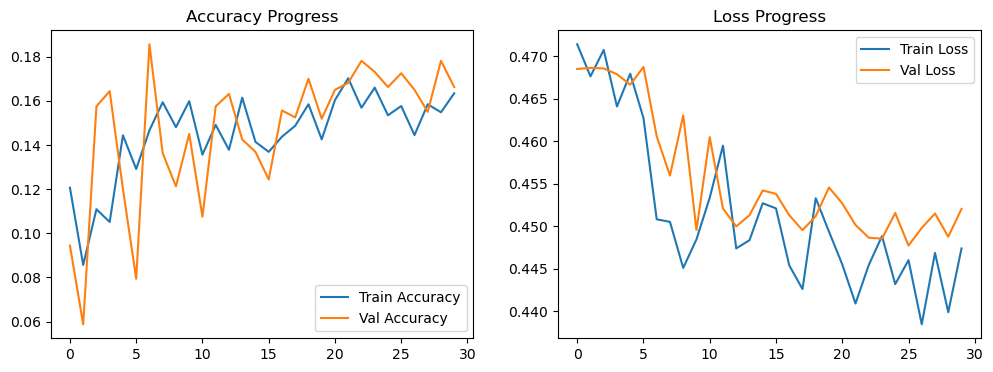

65/65 ━━━━━━━━━━━━━━━━━━━━ 14s 210ms/step
                          precision    recall  f1-score   support

   bacterial_leaf_blight       0.00      0.00      0.00        95
   bacterial_leaf_streak       0.05      0.20      0.08        76
bacterial_panicle_blight       0.02      0.09      0.03        67
                   blast       0.00      0.00      0.00       347
              brown_spot       0.00      0.00      0.00       193
              dead_heart       0.16      0.11      0.13       288
            downy_mildew       0.04      0.08      0.06       124
                   hispa       0.13      0.04      0.06       318
                  normal       0.17      0.45      0.25       352
                  tungro       0.17      0.02      0.04       217

                accuracy                           0.11      2077
               macro avg       0.08      0.10      0.06      2077
            weighted avg       0.10      0.11      0.08      2077



/home/derrickle/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/derrickle/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/derrickle/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


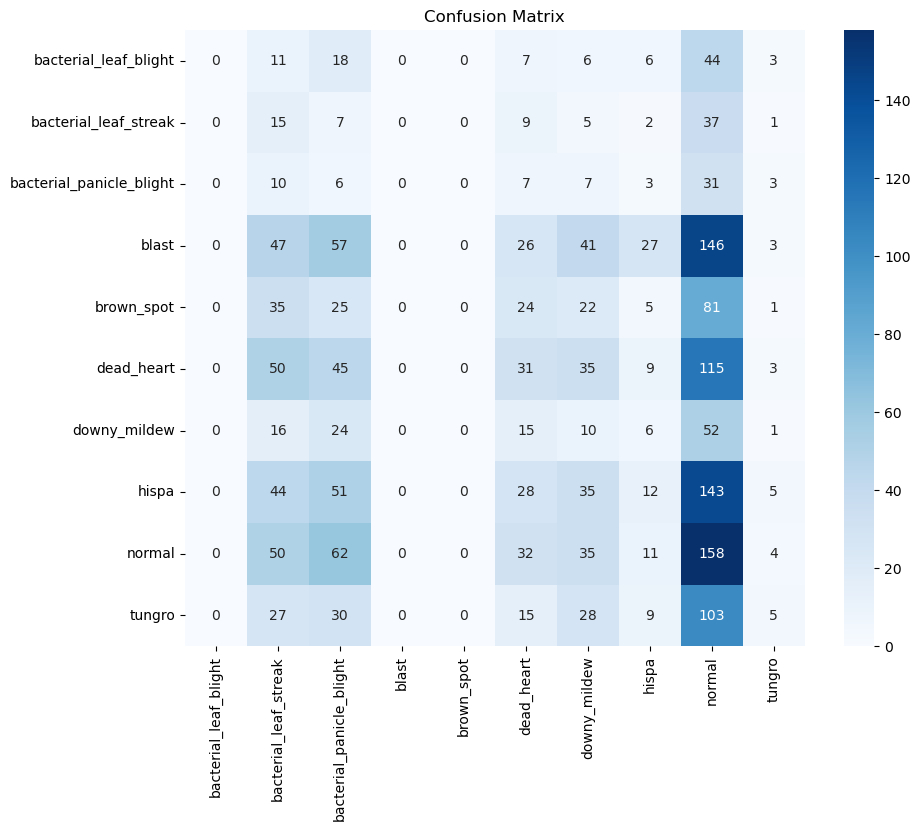

In [2]:
# Custom data loader with real-time augmentation
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.  /255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2 
)

# Train generator
train_generator = train_datagen.flow_from_directory(
    DATA_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    color_mode='rgb'
)

# Validation generator
val_generator = train_datagen.flow_from_directory(
    DATA_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    color_mode='rgb'
)

def build_dwscnn(input_shape=(224,224,3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    
    # Initial feature extraction
    x = layers.Conv2D(32, (3,3), activation='relu')(inputs)
    x = layers.DepthwiseConv2D((3,3), activation='relu')(x)
    x = layers.MaxPooling2D(2,2)(x)
    
    # Depthwise block
    x = layers.DepthwiseConv2D((3,3), activation='relu')(x)
    x = layers.Conv2D(64, (1,1), activation='relu')(x)
    x = layers.MaxPooling2D(2,2)(x)
    
    # Final layers
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    
    return models.Model(inputs, outputs)

model = build_dwscnn()
model.summary()

# ## 3. Class Balancing Strategy
# Compute class weights
class_counts = {cls: len(os.listdir(os.path.join(DATA_PATH, cls))) for cls in CLASS_NAMES}
total = sum(class_counts.values())
class_weights = {i: total/(len(class_counts)*count) for i, (cls, count) in enumerate(class_counts.items())}

# Custom focal loss implementation
def focal_loss(gamma=2., alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        pt = tf.where(tf.equal(y_true, 1), y_pred, 1 - y_pred)
        return -tf.reduce_sum(alpha * tf.pow(1. - pt, gamma) * tf.math.log(pt), axis=-1)
    return focal_loss_fixed

# ## 4. Training Configuration
# Compile model with mixed precision
tf.keras.mixed_precision.set_global_policy('mixed_float16')

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=focal_loss(),
              metrics=['accuracy'])

# Callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3),
    tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True)
]

# ## 5. Prototype Training
# Train with subset for prototyping
history = model.fit(
    train_generator,
    steps_per_epoch=100,  # Reduced for quick iteration
    validation_data=val_generator,
    validation_steps=50,
    epochs=30,
    class_weight=class_weights,
    callbacks=callbacks
)

# ## 6. Local Evaluation
# Plot training history
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Progress')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Progress')
plt.legend()
plt.show()

# Confusion matrix on validation set
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

val_preds = model.predict(val_generator)
val_labels = val_generator.classes
pred_classes = np.argmax(val_preds, axis=1)

print(classification_report(val_labels, pred_classes, target_names=CLASS_NAMES))

plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(val_labels, pred_classes), 
            annot=True, fmt='d', cmap='Blues',
            xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
plt.title('Confusion Matrix')
plt.show()
